# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

# Load Dataset

## Train Dataset

In [ ]:
# Membuka dataset train

train = pd.read_csv('/content/drive/MyDrive/StartupCampus/[JOB] Loan Prediction/Training Data.csv')
train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## Test Dataset

In [ ]:
# Membuka dataset test

data_test = pd.read_csv('/content/drive/MyDrive/StartupCampus/[JOB] Loan Prediction/Test Data.csv')
data_test

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


# Basic EDA

In [ ]:
# Menambahkan kolom baru yang berisi kategori rentang umur

def cat_age (x):
  if (x >= 21) & (x < 31):
    return '21 - 30'
  elif (x >= 31) & (x < 41):
    return '31 - 40'
  elif (x >= 41) & (x < 51):
    return '41 - 50'
  elif (x >= 51) & (x < 61):
    return '51 - 60'
  elif (x >= 61) & (x < 71):
    return '61 - 70'
  elif (x >= 71) & (x < 80):
    return '71 - 80'

train['cat_age'] = train['Age'].apply(cat_age)

## By Category Age

In [ ]:
# Perbandingan jumlah taat(0) dan mangkir(1)

train['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [ ]:
# jumlah yang mangkir bayar berdasarkan rentang usia

train.groupby(['cat_age'])[['Risk_Flag']].sum().sort_values(by='Risk_Flag', ascending=False)

,Risk_Flag
cat_age,
21 - 30,6318
41 - 50,5232
51 - 60,5130
61 - 70,4997
31 - 40,4872
71 - 80,4447


## By Status

In [ ]:
# jumlah yang mangkir pembayaran berdasarkan status perkawinan

train.groupby(['Married/Single'])[['Risk_Flag']].sum().sort_values(by='Risk_Flag', ascending=False)

,Risk_Flag
Married/Single,
single,28360
married,2636


## By Profession

In [ ]:
# jumlah yang mangkir pembayaran berdasarkan status profesi

train.groupby(['Profession'])[['Risk_Flag']].sum().sort_values(by='Risk_Flag', ascending=False)

,Risk_Flag
Profession,
Police_officer,826
Software_Developer,750
Air_traffic_controller,715
Surveyor,714
Physician,710
Army_officer,709
Hotel_Manager,701
Technical_writer,697
Chartered_Accountant,690


## By State

In [ ]:
# jumlah yang mangkir pembayaran berdasarkan negara bagian

train.groupby(['STATE'])[['Risk_Flag']].sum().sort_values(by='Risk_Flag', ascending=False)

,Risk_Flag
STATE,
Uttar_Pradesh,3343
West_Bengal,3009
Andhra_Pradesh,2935
Maharashtra,2895
Bihar,2583
Madhya_Pradesh,2180
Tamil_Nadu,1706
Gujarat,1343
Rajasthan,1292


# Data Pre-Processing

In [ ]:
train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,cat_age
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,21 - 30
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,31 - 40
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,61 - 70
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,41 - 50
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,41 - 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,41 - 50
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,21 - 30
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,41 - 50
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,41 - 50


## Drop Unused Columns

In [ ]:
# Menghapus kolom yang tidak digunakan untuk pemodelan

train.drop(columns=['Id', 'cat_age'], inplace=True)
train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


## Label Enconding

In [ ]:
# Mengubah kolom kolom kategorikal menjadi numerikal

features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoder = LabelEncoder()

for col in features:
  train[col] = label_encoder.fit_transform(train[col])

In [ ]:
train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


## Scaling

In [ ]:
# Mengubah nilai pada setiap kolom agar menjadi rentang skala yang sama (0 - 1)

scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = train.columns)

train_scaled

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


# Split Train Dataset into Train and Validation

Dataset training dipecah menjadi 80% data train, 20% data validation


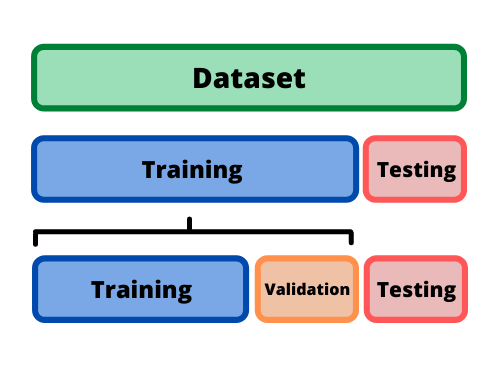

In [ ]:
train_scaled

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


In [ ]:
# split into 80% train and 20% validation
# --->>> train = 201.600 data
# --->>> val = 50.400 data

df_train = train_scaled.iloc[:201600]
df_val = train_scaled.iloc[201600:]

In [ ]:
df_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201595,0.709743,0.672414,0.90,1.0,0.5,0.0,0.20,0.715190,0.500000,0.785714,0.25,0.0
201596,0.081600,0.724138,0.40,1.0,1.0,0.0,0.24,0.778481,0.357143,0.571429,0.50,0.0
201597,0.006704,0.827586,0.85,1.0,1.0,0.0,0.22,0.316456,0.071429,0.714286,1.00,0.0
201598,0.147250,0.206897,0.95,1.0,1.0,1.0,0.44,0.655063,0.500000,0.571429,0.25,0.0


In [ ]:
df_val

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
201600,0.953217,0.500000,0.60,1.0,1.0,0.0,0.10,0.300633,0.892857,0.714286,0.00,0.0
201601,0.748566,0.672414,0.45,1.0,1.0,0.0,0.94,0.436709,0.892857,0.642857,0.00,0.0
201602,0.665935,0.982759,0.35,1.0,1.0,1.0,0.54,0.639241,0.214286,0.285714,0.25,0.0
201603,0.363355,0.758621,0.10,1.0,1.0,1.0,0.44,0.319620,0.892857,0.142857,0.50,0.0
201604,0.223330,0.551724,0.85,1.0,1.0,0.0,0.74,0.256329,0.357143,0.357143,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


# Data Pre-modeling

## Handling Outliers

Memeriksa apakah terdapat outliers pada beberapa kolom

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


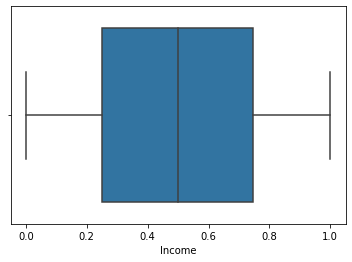

In [ ]:
sns.boxplot(df_train['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


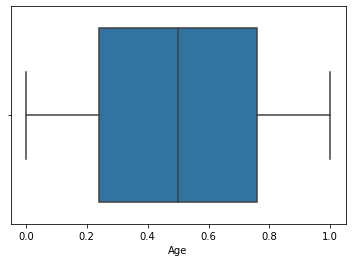

In [ ]:
sns.boxplot(df_train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


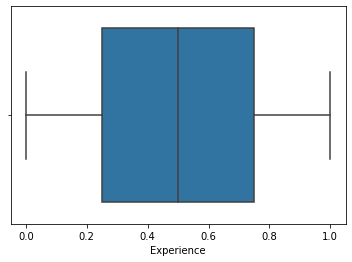

In [ ]:
sns.boxplot(df_train['Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


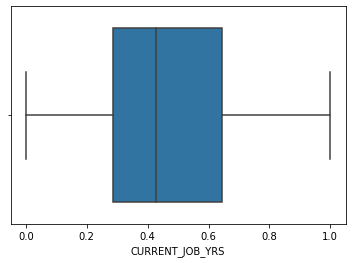

In [ ]:
sns.boxplot(df_train['CURRENT_JOB_YRS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


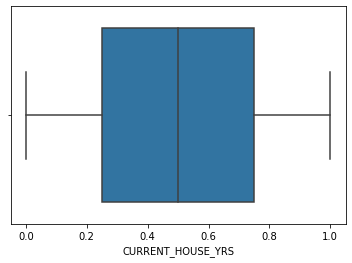

In [ ]:
sns.boxplot(df_train['CURRENT_HOUSE_YRS'])

## Balancing

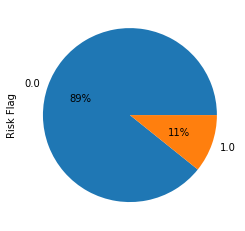

In [ ]:
df_train['Risk_Flag'].value_counts().plot(kind='pie', label='Risk Flag', autopct='%.0f%%')

Diketahui data untuk melatih model belum seimbang ( No = 89%, yes = 11%), maka akan digunakan balancing agar data untuk melatih model menjadi seimbang 50% : 50%

In [ ]:
X = df_train.drop(columns=['Risk_Flag'])
y = df_train['Risk_Flag']

In [ ]:
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 179911, 1.0: 21689})
Resampled dataset shape Counter({0.0: 179911, 1.0: 179911})


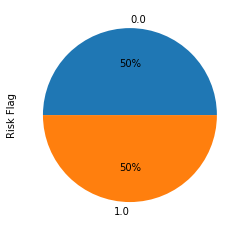

In [ ]:
y_res.value_counts().plot(kind='pie', label= 'Risk Flag', autopct='%.0f%%')

Data sudah seimbang (jumlah target sama 50% : 50%)

## Split Data for Modeling

In [ ]:
# Split data untuk modeling (train test split)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# Modeling

In [ ]:
# Membuat function untuk menampilkan semua model yang dibandingkan
# beserta nilai akurasi metriknya (accuracy, precision, recall, f1, roc_auc)

def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [ ]:
# Import semua model yang akan dibandingkan

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Classifier':RidgeClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=42),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=42),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
}

In [ ]:
# Import seluruh metrics akurasi

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train, y_train)
  y_pred_list[name] = model.predict(X_test)

score = get_score(y_pred_list, y_test, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.548935,0.549241,0.548979,0.548354,0.548979
Ridge Classifier,0.548913,0.549226,0.548957,0.548316,0.548957
KNN,0.945518,0.948722,0.945569,0.945425,0.945569
SVC,0.727722,0.735675,0.727832,0.725468,0.727832
Neural Network,0.774056,0.782965,0.774162,0.772309,0.774162
Decision Tree,0.950153,0.954566,0.950213,0.950037,0.950213
Gradient Boosting Classifier,0.653797,0.653968,0.653816,0.653719,0.653816
AdaBoost Classifier,0.581451,0.581490,0.581462,0.581419,0.581462
Hist Gradient Boosting,0.875217,0.877688,0.875265,0.875022,0.875265


## Choosing Best Model : Random Forest

In [ ]:
# modeling data train dengan random forest
# cek akurasi data trai split

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.949864006581044

In [ ]:
# Evaluasi dengan cek akurasi data test split

from sklearn import metrics

model_predict = model.predict(X_test)
print('Akurasi Menggunakan Model KNN Adalah: ', metrics.accuracy_score(y_test, model_predict))

Akurasi Menggunakan Model KNN Adalah:  0.9501645248788296


# Evaluating With Data Validation

In [ ]:
# Data validasi

df_val

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
201600,0.953217,0.500000,0.60,1.0,1.0,0.0,0.10,0.300633,0.892857,0.714286,0.00,0.0
201601,0.748566,0.672414,0.45,1.0,1.0,0.0,0.94,0.436709,0.892857,0.642857,0.00,0.0
201602,0.665935,0.982759,0.35,1.0,1.0,1.0,0.54,0.639241,0.214286,0.285714,0.25,0.0
201603,0.363355,0.758621,0.10,1.0,1.0,1.0,0.44,0.319620,0.892857,0.142857,0.50,0.0
201604,0.223330,0.551724,0.85,1.0,1.0,0.0,0.74,0.256329,0.357143,0.357143,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


In [ ]:
# Split antara kolom features dan kolom target

X_val = df_val.drop(columns=['Risk_Flag'])
y_val = df_val['Risk_Flag']

In [ ]:
# Periksa akurasi hasil predict dengan hasil sebenernya

model.score(X_val, y_val)

0.8380555555555556

In [ ]:
val_predict = model.predict(X_val)
# print(val_predict)

print('Akurasi model ini adalah: ', metrics.accuracy_score(y_val, val_predict))

Akurasi model ini adalah:  0.8380555555555556


model yang sudah dilatih dapat memprediksi data baru (data yang belum pernah dilatih oleh model sebelumnya) dengan akurasi hingga sekitar 83%

# Prediction

In [ ]:
# Data test untuk prediksi

data_test

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## Data Pre-Processing

### Drop Unsued Columns

In [ ]:
# Hapus kolom yang tidak digunakan untuk prediksi

test = data_test.drop(columns=['ID'])
test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


### Label Encoding

In [ ]:
# Mengubah kolom kategorikal menjadi kolom numerikal

test_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoder = LabelEncoder()

for col in test_features:
  test[col] = label_encoder.fit_transform(test[col])

In [ ]:
test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,181,28,4,13
1,1215004,25,5,1,2,0,24,131,14,5,10
2,8901342,50,12,1,2,0,30,290,14,9,14
3,1944421,49,9,0,2,1,1,171,14,3,12
4,13429,25,18,1,2,1,12,39,28,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,90,0,5,10
27996,2917765,47,9,1,2,0,47,249,13,9,14
27997,8082415,24,5,1,2,0,30,190,14,4,13
27998,9474180,51,13,1,2,1,7,47,4,13,14


### Scaling

In [ ]:
# Mengubah nilai pada setiap kolom agar menjadi rentang skala yang sama (0 - 1)

scaler = MinMaxScaler()
scaler.fit(test)
df_test = scaler.transform(test)
df_test = pd.DataFrame(df_test, columns = test.columns)

df_test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.52,0.572785,1.000000,0.285714,0.75
1,0.120596,0.068966,0.25,1.0,1.0,0.0,0.48,0.414557,0.500000,0.357143,0.00
2,0.890037,0.500000,0.60,1.0,1.0,0.0,0.60,0.917722,0.500000,0.642857,1.00
3,0.193614,0.482759,0.45,0.0,1.0,1.0,0.02,0.541139,0.500000,0.214286,0.50
4,0.000312,0.068966,0.90,1.0,1.0,1.0,0.24,0.123418,1.000000,0.928571,0.25
...,...,...,...,...,...,...,...,...,...,...,...
27995,0.995562,0.620690,0.65,1.0,1.0,0.0,0.88,0.284810,0.000000,0.357143,0.00
27996,0.291051,0.448276,0.45,1.0,1.0,0.0,0.94,0.787975,0.464286,0.642857,1.00
27997,0.808059,0.051724,0.25,1.0,1.0,0.0,0.60,0.601266,0.500000,0.285714,0.75
27998,0.947381,0.517241,0.65,1.0,1.0,1.0,0.14,0.148734,0.142857,0.928571,1.00


## Predict Test Dataset

In [ ]:
# Predict data test dengan menggunakan model yang dimiliki

prediction = model.predict(df_test)

In [ ]:
print(len(prediction))

28000


In [ ]:
# Menambahkan kolom baru pada test yakni hasil prediksi menggunakan model

df_test['Risk_Flag'] = prediction
df_test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.52,0.572785,1.000000,0.285714,0.75,0.0
1,0.120596,0.068966,0.25,1.0,1.0,0.0,0.48,0.414557,0.500000,0.357143,0.00,0.0
2,0.890037,0.500000,0.60,1.0,1.0,0.0,0.60,0.917722,0.500000,0.642857,1.00,0.0
3,0.193614,0.482759,0.45,0.0,1.0,1.0,0.02,0.541139,0.500000,0.214286,0.50,0.0
4,0.000312,0.068966,0.90,1.0,1.0,1.0,0.24,0.123418,1.000000,0.928571,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.995562,0.620690,0.65,1.0,1.0,0.0,0.88,0.284810,0.000000,0.357143,0.00,0.0
27996,0.291051,0.448276,0.45,1.0,1.0,0.0,0.94,0.787975,0.464286,0.642857,1.00,0.0
27997,0.808059,0.051724,0.25,1.0,1.0,0.0,0.60,0.601266,0.500000,0.285714,0.75,0.0
27998,0.947381,0.517241,0.65,1.0,1.0,1.0,0.14,0.148734,0.142857,0.928571,1.00,0.0


In [ ]:
# Perbandingan Risk Flag hasil prediksi

df_test['Risk_Flag'].value_counts()

0.0    23207
1.0     4793
Name: Risk_Flag, dtype: int64